# Collecting Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.DataFrame()
data['Hours_Studied'] = [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]
data['Pass'] = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

# Analyzing Data

In [3]:
data.head()

,Hours_Studied,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  20 non-null     float64
 1   Pass           20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [5]:
data.describe()

,Hours_Studied,Pass
count,20.000000,20.000000
mean,2.787500,0.500000
std,1.507165,0.512989
min,0.500000,0.000000
25%,1.687500,0.000000
50%,2.625000,0.500000
75%,4.062500,1.000000
max,5.500000,1.000000


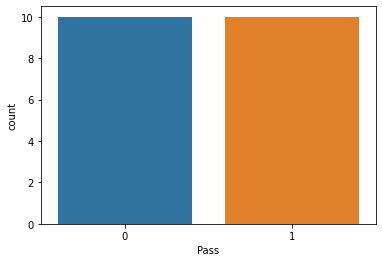

In [9]:
sns.countplot(x='Pass', data=data)

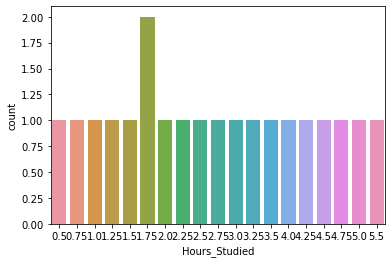

In [13]:
sns.countplot(x='Hours_Studied', data=data)

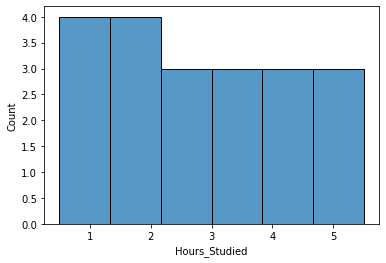

In [14]:
sns.histplot(data['Hours_Studied'])

# Wrangling Data

In [15]:
data.isnull()

,Hours_Studied,Pass
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [17]:
data.isnull().sum()

Hours_Studied    0
Pass             0
dtype: int64

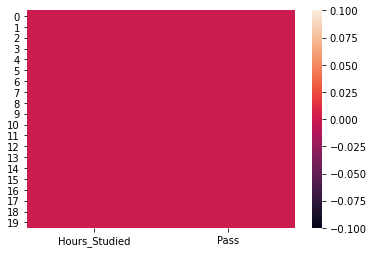

In [18]:
sns.heatmap(data.isnull())

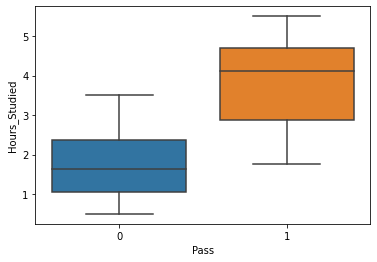

In [19]:
sns.boxplot(x='Pass', y='Hours_Studied', data=data)

In [20]:
data.dropna(inplace=True)

# Train & Test Data

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB, GaussianNB

In [49]:
x = data['Hours_Studied'].to_numpy().reshape(-1, 1)
y = data['Pass']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [51]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [63]:
print('Intercept: ', logmodel.intercept_)
print('Coefficients: ', logmodel.coef_)

Intercept:  [-3.98263838]
Coefficients:  [[1.26120109]]


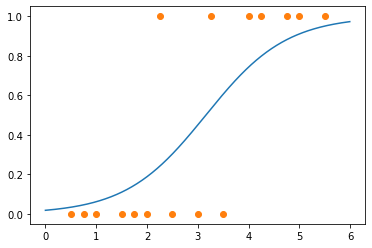

In [64]:
x = np.arange(0, 6.0, 0.01).reshape(-1, 1)
logit = logmodel.decision_function(x)
p = 1/(1+np.exp(-logit))
plt.plot(x, p)
plt.plot(x_train, y_train, 'o')


In [52]:
logmodel_predictions = logmodel.predict(x_test)

In [53]:
naive_bayes_clf = CategoricalNB()
naive_bayes_clf.fit(x_train, y_train)

CategoricalNB()

In [54]:
naive_bayes_predictions = naive_bayes_clf.predict(x_test)

In [55]:
gau_bayes_clf = GaussianNB()
gau_bayes_clf.fit(x_train, y_train)

GaussianNB()

In [56]:
gau_bayes_predictions = gau_bayes_clf.predict(x_test)

# Accuracy Check

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
classification_report(y_test,logmodel_predictions)

'              precision    recall  f1-score   support\n\n           0       0.33      1.00      0.50         1\n           1       1.00      0.33      0.50         3\n\n    accuracy                           0.50         4\n   macro avg       0.67      0.67      0.50         4\nweighted avg       0.83      0.50      0.50         4\n'

In [59]:
confusion_matrix(y_test, logmodel_predictions)

array([[1, 0],
       [2, 1]], dtype=int64)

In [60]:
accuracy_score(y_test, logmodel_predictions)

0.5

In [61]:
accuracy_score(y_test, naive_bayes_predictions)

0.5

In [62]:
accuracy_score(y_test, gau_bayes_predictions)

0.5